In [8]:
from predict import *

In [9]:
input_filenames = ['temperture_2008.csv',
                   'amount_of_precipitation_2008.csv',
                   'hours_of_sunlight_2008.csv',
                   'wind_speed_2008.csv']
X_train, y_train = prepare_data(input_filenames, 'weather_2008.csv', 'demand_2008.csv')

input_filenames = ['temperture_2010.csv',
                   'amount_of_precipitation_2010.csv',
                   'hours_of_sunlight_2010.csv',
                   'wind_speed_2010.csv']
temp_X, temp_y = prepare_data(input_filenames, 'weather_2010.csv', 'demand_2010.csv')
X_train = np.vstack((X_train, temp_X))
y_train = np.vstack((y_train, temp_y))

input_filenames = ['temperture_2011.csv',
                   'amount_of_precipitation_2011.csv',
                   'hours_of_sunlight_2011.csv',
                   'wind_speed_2011.csv']
temp_X, temp_y = prepare_data(input_filenames, 'weather_2011.csv', 'demand_2011.csv')
X_train = np.vstack((X_train, temp_X))
y_train = np.vstack((y_train, temp_y))

input_filenames = ['temperture_2012.csv',
                   'amount_of_precipitation_2012.csv',
                   'hours_of_sunlight_2012.csv',
                   'wind_speed_2012.csv']
temp_X, temp_y = prepare_data(input_filenames, 'weather_2012.csv', 'demand_2012.csv')
X_train = np.vstack((X_train, temp_X))
y_train = np.vstack((y_train, temp_y))

input_filenames = ['temperture_2014.csv',
                   'amount_of_precipitation_2014.csv',
                   'hours_of_sunlight_2014.csv',
                   'wind_speed_2014.csv']
temp_X, temp_y = prepare_data(input_filenames, 'weather_2014.csv', 'demand_2014.csv')
X_train = np.vstack((X_train, temp_X))
y_train = np.vstack((y_train, temp_y))

input_filenames = ['temperture_2016.csv',
                   'amount_of_precipitation_2016.csv',
                   'hours_of_sunlight_2016.csv',
                   'wind_speed_2016.csv']
X_test, y_test = prepare_data(input_filenames, 'weather_2016.csv', 'demand_2016.csv', demand_header=2)

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
reg = RandomForestRegressor(random_state=0, n_jobs=-1)

def objective(params):
    global reg
    reg = set_params(params, reg)
    return cross_validation(reg, X_train, y_train)
space = [(1, 1e5),  # n_estimators
         (1, 1e5),  # max_depth
         (1, X_train.shape[1]),  # max_features
         (2, 1e5),  # min_samples_split
         (1, 1e5)]  # min_samples_leaf
res_gp = gp_minimize(objective, space, n_calls=10, random_state=0, verbose=0, n_jobs=-1)
math.sqrt(res_gp.fun)
reg = set_params(res_gp.x, reg)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
math.sqrt(mean_squared_error(y_pred, y_test))

310.38413543307723

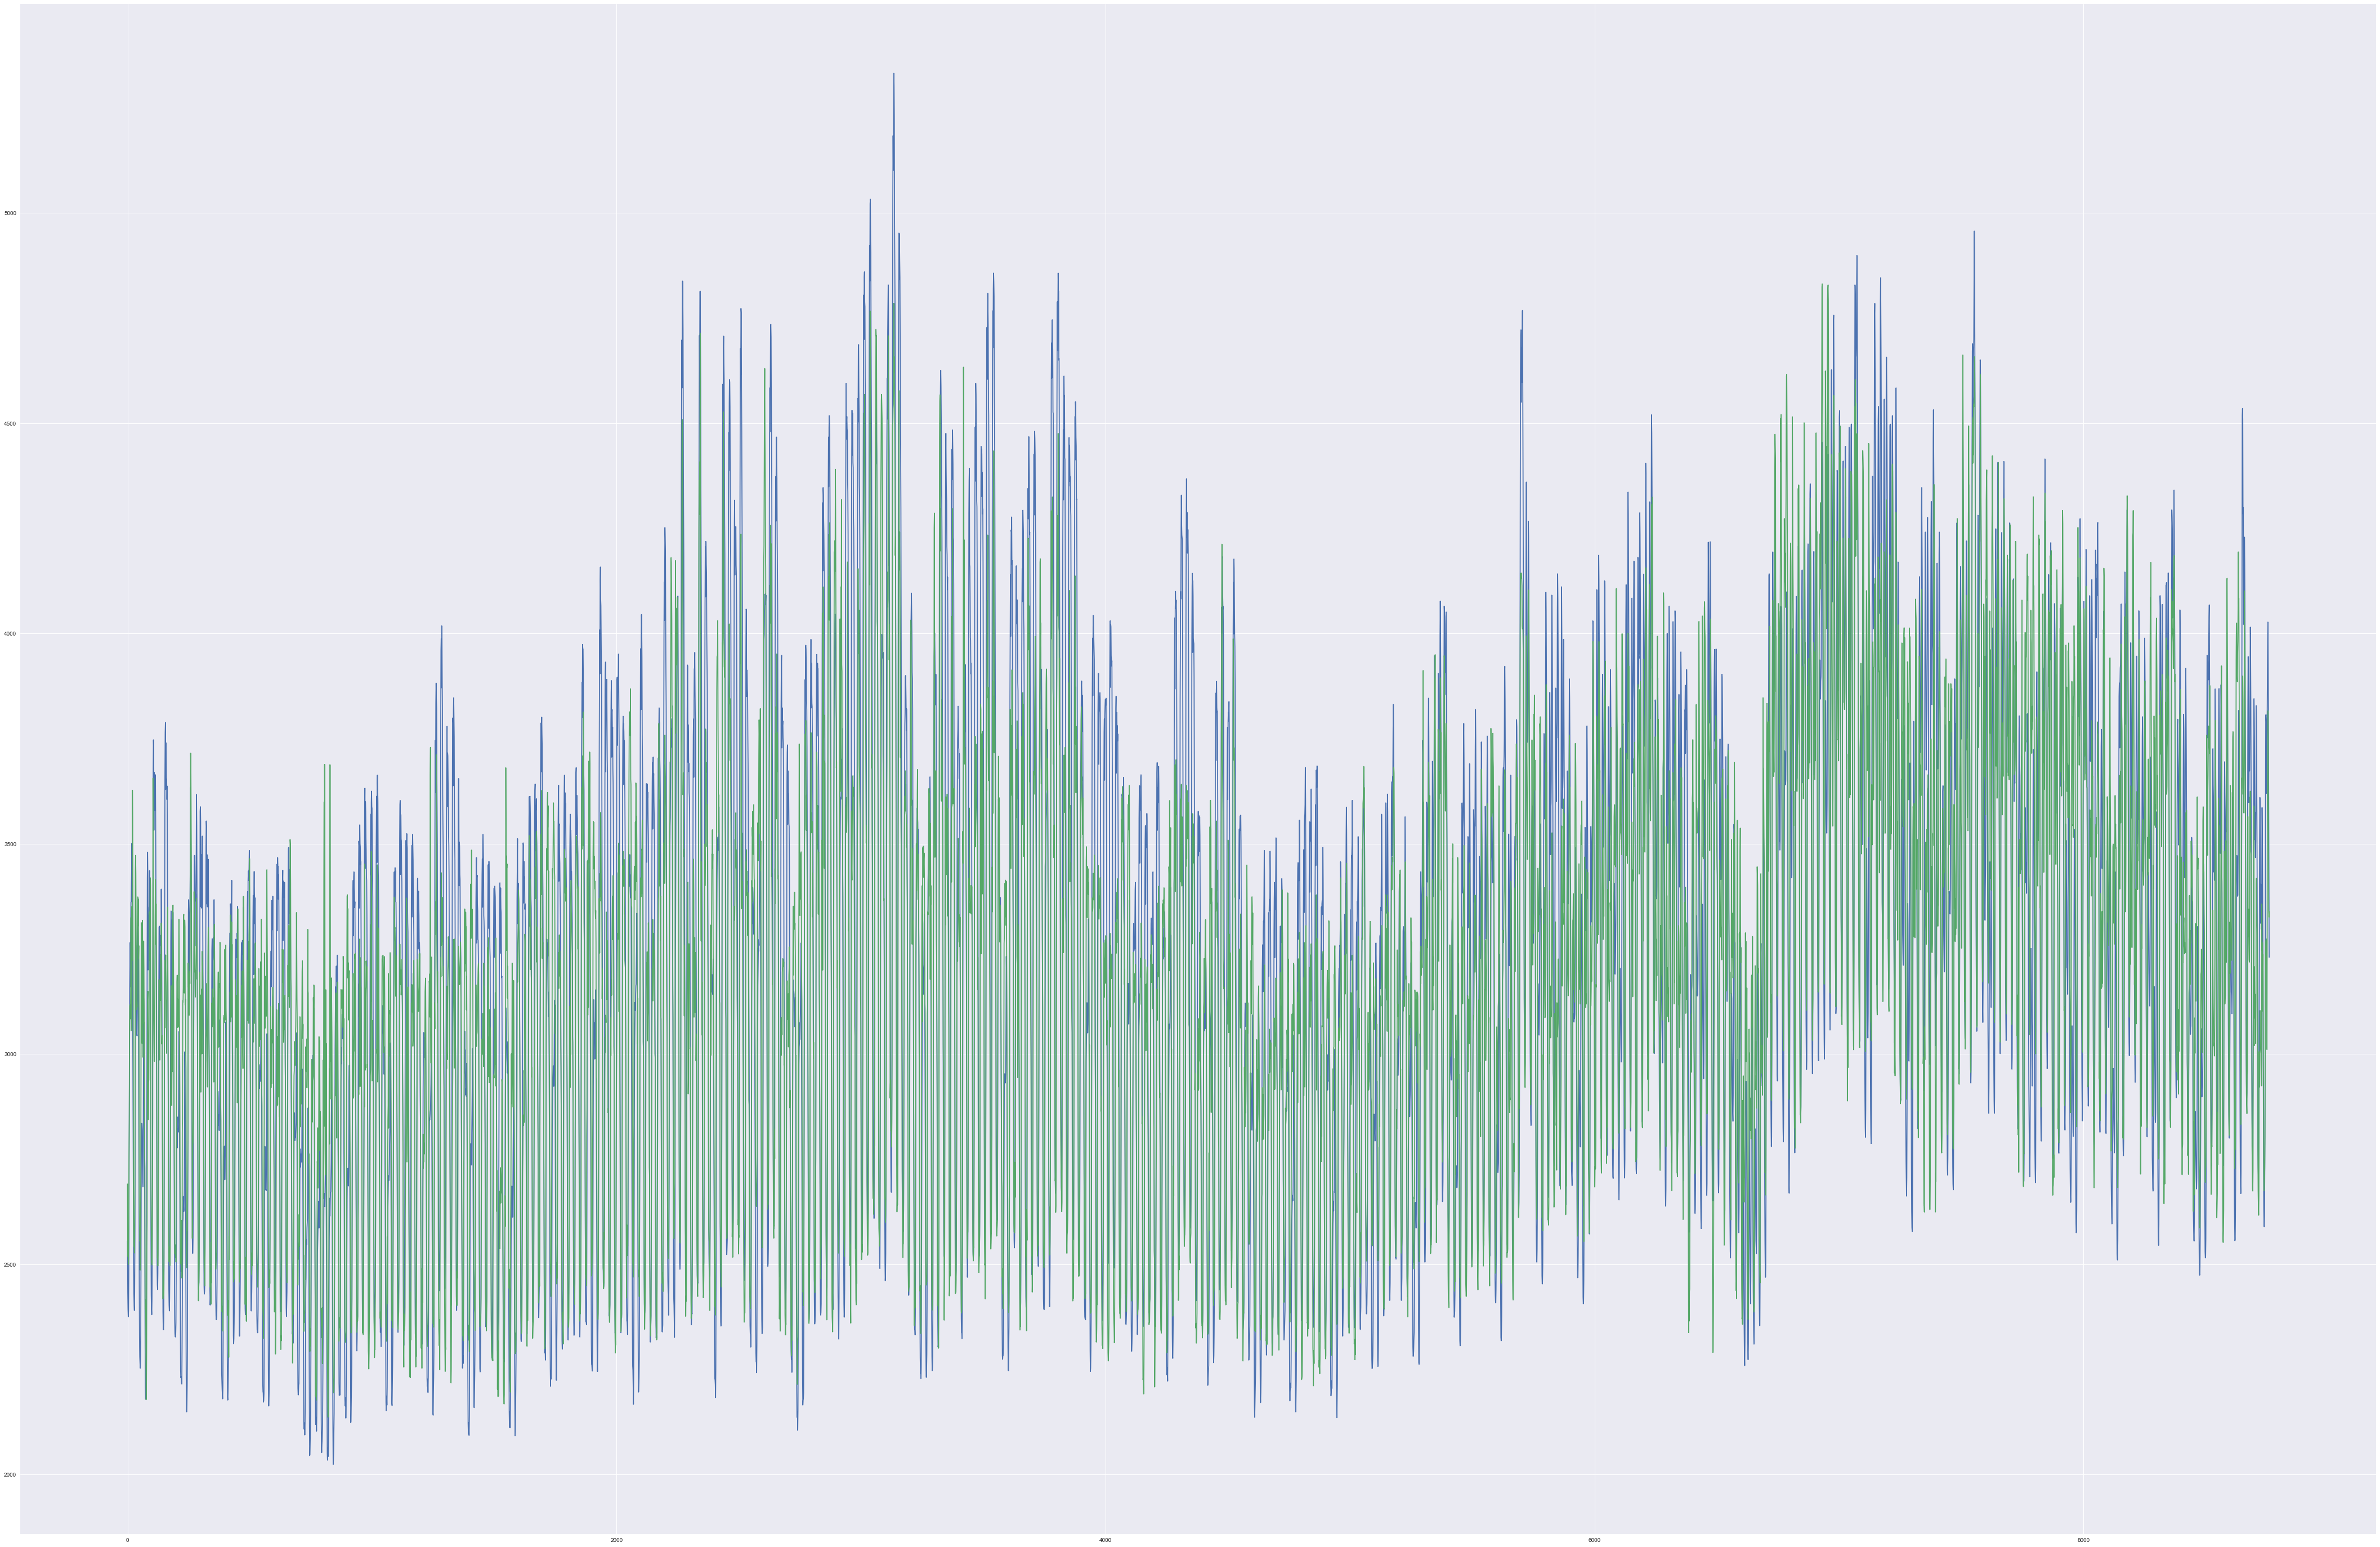

In [22]:
plot_convergence(res_gp)
plt.figure(figsize=(20, 10))
plt.plot(range(0, X_test.shape[0]), y_test)
plt.plot(range(0, X_test.shape[0]), y_pred)
plt.show()